In [1]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from pprint import pprint

#file locations
#data file
csv_file_2016 ="CENSUS_and_POPULATION_FINAL_2016.csv"

##NOTES###
#this dataset doesn't include Alaska,all counties were removed bc county names didn't match**
##Lousiana, also**
##It DOES include DC, and counts it as a state**





In [46]:
#read CSV files
analysis_data_2016= pd.read_csv(csv_file_2016)
analysis_data_2016

,County,State,State_Code,Location,Year,Party,Candidate,Candidate_Votes,Total_Votes,County_Pop_2016
0,Autauga,Alabama,AL,"Alabama, Autauga",2016,democrat,Hillary Clinton,5936.0,24973,"55,243"
1,Autauga,Alabama,AL,"Alabama, Autauga",2016,republican,Donald Trump,18172.0,24973,"55,243"
2,Baldwin,Alabama,AL,"Alabama, Baldwin",2016,democrat,Hillary Clinton,18458.0,95215,"207,601"
3,Baldwin,Alabama,AL,"Alabama, Baldwin",2016,republican,Donald Trump,72883.0,95215,"207,601"
4,Barbour,Alabama,AL,"Alabama, Barbour",2016,democrat,Hillary Clinton,4871.0,10469,"25,806"
...,...,...,...,...,...,...,...,...,...,...
6053,Uinta,Wyoming,WY,"Wyoming, Uinta",2016,republican,Donald Trump,6154.0,8470,"20,682"
6054,Washakie,Wyoming,WY,"Wyoming, Washakie",2016,democrat,Hillary Clinton,532.0,3814,"8,165"
6055,Washakie,Wyoming,WY,"Wyoming, Washakie",2016,republican,Donald Trump,2911.0,3814,"8,165"
6056,Weston,Wyoming,WY,"Wyoming, Weston",2016,democrat,Hillary Clinton,299.0,3526,"7,220"


In [52]:
#removing commas from County Population Data
#analysis_data_2016["County_Pop_2016"] = analysis_data_2016["County_Pop_2016"].str.replace(",","").astype(float)


In [55]:
analysis_data_2016["Avg_Turnout"] = (analysis_data_2016.Total_Votes / analysis_data_2016.County_Pop_2016)
analysis_data_2016

,County,State,State_Code,Location,Year,Party,Candidate,Candidate_Votes,Total_Votes,County_Pop_2016,Avg_Turnout
0,Autauga,Alabama,AL,"Alabama, Autauga",2016,democrat,Hillary Clinton,5936.0,24973,55243.0,0.452057
1,Autauga,Alabama,AL,"Alabama, Autauga",2016,republican,Donald Trump,18172.0,24973,55243.0,0.452057
2,Baldwin,Alabama,AL,"Alabama, Baldwin",2016,democrat,Hillary Clinton,18458.0,95215,207601.0,0.458644
3,Baldwin,Alabama,AL,"Alabama, Baldwin",2016,republican,Donald Trump,72883.0,95215,207601.0,0.458644
4,Barbour,Alabama,AL,"Alabama, Barbour",2016,democrat,Hillary Clinton,4871.0,10469,25806.0,0.405681
...,...,...,...,...,...,...,...,...,...,...,...
6053,Uinta,Wyoming,WY,"Wyoming, Uinta",2016,republican,Donald Trump,6154.0,8470,20682.0,0.409535
6054,Washakie,Wyoming,WY,"Wyoming, Washakie",2016,democrat,Hillary Clinton,532.0,3814,8165.0,0.467116
6055,Washakie,Wyoming,WY,"Wyoming, Washakie",2016,republican,Donald Trump,2911.0,3814,8165.0,0.467116
6056,Weston,Wyoming,WY,"Wyoming, Weston",2016,democrat,Hillary Clinton,299.0,3526,7220.0,0.488366


In [56]:
# 1. What is the overall average voter turnout for 2004 per (((state))), and per county
State_Avg_Turnout = round((analysis_data_2016.groupby('State_Code')['Avg_Turnout'].mean() * 100), 2)

State_Avg_Voter_Turnout = pd.DataFrame(State_Avg_Turnout)
State_Avg_Voter_Turnout_1 = State_Avg_Voter_Turnout.reset_index()
State_Avg_Voter_Turnout_1


,State_Code,Avg_Turnout
0,AL,45.37
1,AR,38.02
2,AZ,41.58
3,CA,39.88
4,CO,53.65
5,CT,47.86
6,DC,45.39
7,DE,46.12
8,FL,46.60
9,GA,39.47


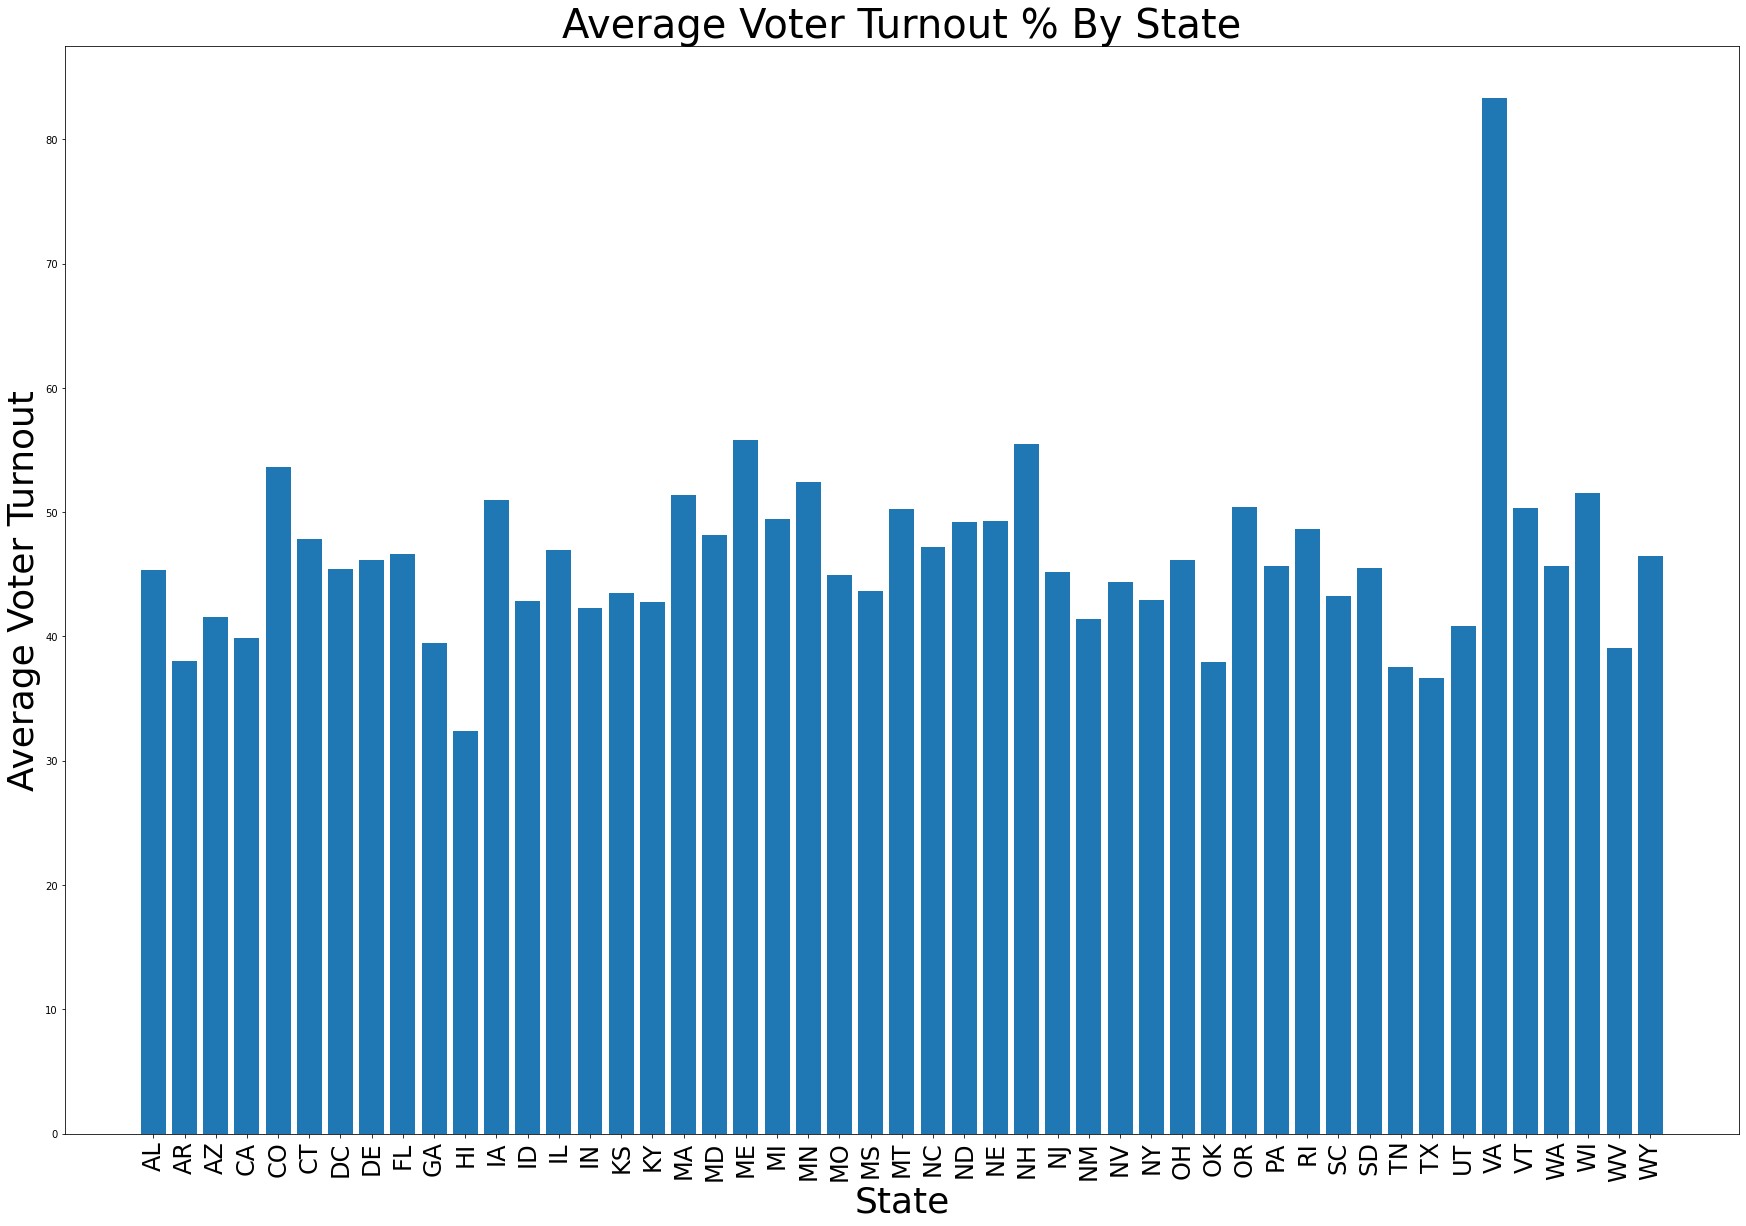

In [62]:
#Bar Graph

Avg_Turnout = State_Avg_Voter_Turnout_1["Avg_Turnout"]
State =  State_Avg_Voter_Turnout_1["State_Code"]
plt.bar(State, Avg_Turnout)
plt.title('Average Voter Turnout % By State', fontsize=40)
plt.xlabel('State', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=24)
plt.rcParams["figure.figsize"] = [30, 20]
plt.savefig('Avg_Voter_State_2016.png')
plt.show()

In [ ]:
# 1. What is the overall average voter turnout for 2016 per state, and per (((county)))
County_Avg_Turnout = round((analysis_data_2016.groupby('Location')['Avg_Turnout'].mean() * 100), 2)
County_Avg_Turnout

County_Avg_Voter_Turnout = pd.DataFrame(County_Avg_Turnout)
County_Avg_Voter_Turnout_1 = County_Avg_Voter_Turnout.reset_index()

In [68]:
Sample_County = County_Avg_Voter_Turnout_1.sample(n = 50)
Sample_County

,Location,Avg_Turnout
290,"District of Columbia, District of Columbia",45.39
594,"Illinois, Greene",42.56
1571,"Nebraska, Clay",49.96
1710,"New Mexico, Luna",29.94
1661,"Nevada, Storey",64.17
705,"Indiana, Jennings",40.33
1352,"Mississippi, Neshoba",35.81
186,"California, Orange",37.84
1608,"Nebraska, Lancaster",43.90
2901,"West Virginia, Webster",34.80


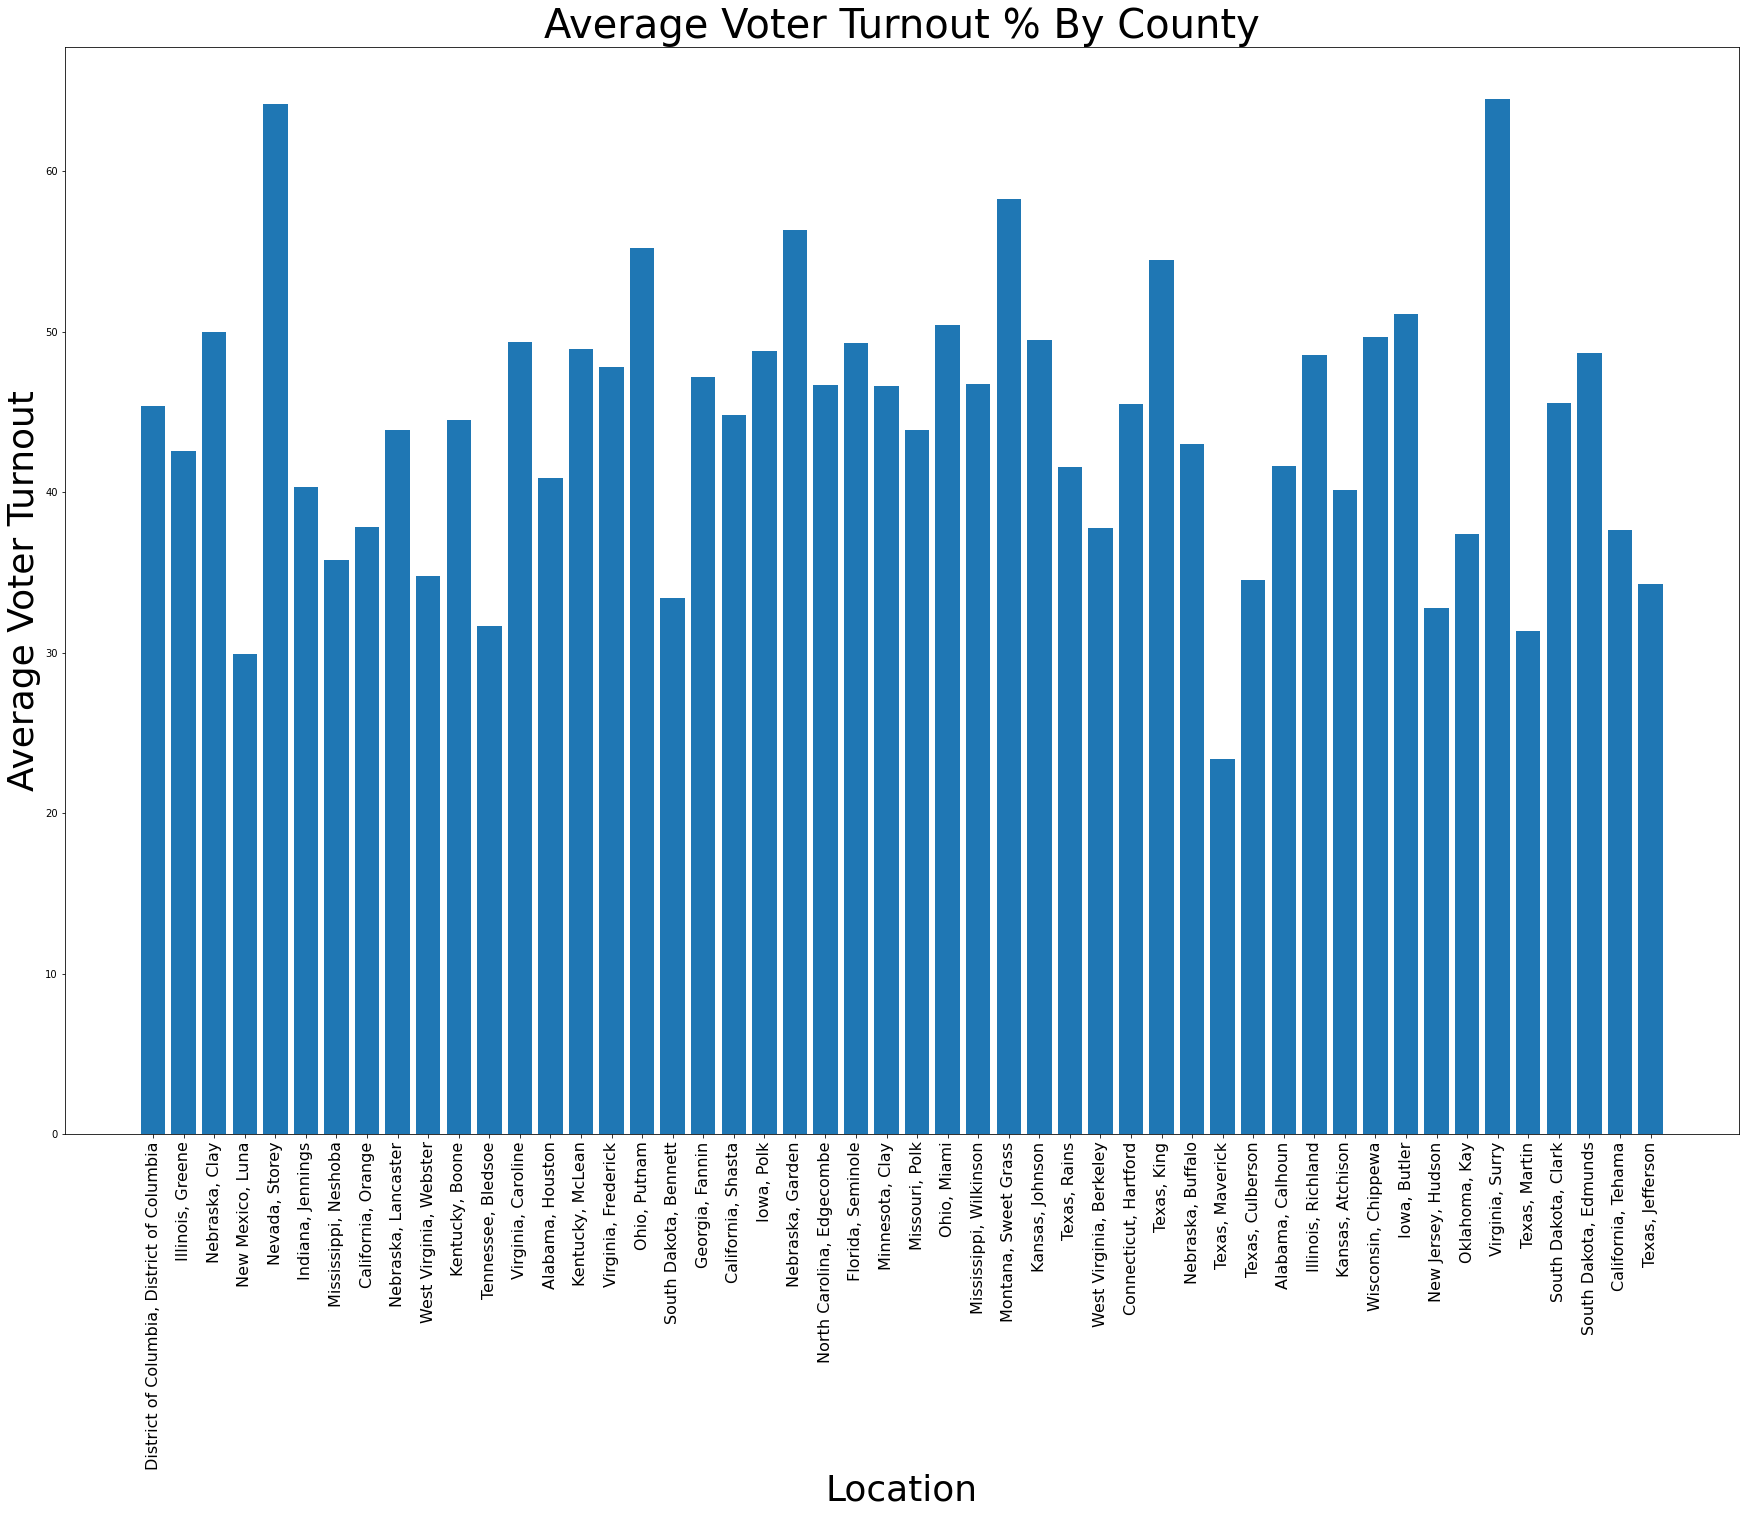

In [70]:
Avg_County_Turnout = Sample_County["Avg_Turnout"]
Location =  Sample_County["Location"]
plt.bar(Location, Avg_County_Turnout)
plt.title('Average Voter Turnout % By County', fontsize=40)
plt.xlabel('Location', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=16)
plt.rcParams["figure.figsize"] = [30, 20]
plt.savefig('Avg_Voter_County_2016.png')

plt.show()